In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split


# Load the dataset
file_path = '/content/drive/MyDrive/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv'
data = pd.read_csv(file_path)

# Display the first few rows and column names
print(data.head())
print(data.columns)
print(len(data.columns))


    Destination Port   Flow Duration   Total Fwd Packets  \
0                 22             166                   1   
1              60148              83                   1   
2                123           99947                   1   
3                123           37017                   1   
4                  0       111161336                 147   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                            0   
1                        2                            0   
2                        1                           48   
3                        1                           48   
4                        0                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       0   
1                             0                       0   
2                            48                      48   
3                            48                 

In [6]:

data.columns = data.columns.str.replace(' ', '')

print(data.columns)


Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288602 entries, 0 to 288601
Data columns (total 79 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DestinationPort          288602 non-null  int64  
 1   FlowDuration             288602 non-null  int64  
 2   TotalFwdPackets          288602 non-null  int64  
 3   TotalBackwardPackets     288602 non-null  int64  
 4   TotalLengthofFwdPackets  288602 non-null  int64  
 5   TotalLengthofBwdPackets  288602 non-null  int64  
 6   FwdPacketLengthMax       288602 non-null  int64  
 7   FwdPacketLengthMin       288602 non-null  int64  
 8   FwdPacketLengthMean      288602 non-null  float64
 9   FwdPacketLengthStd       288602 non-null  float64
 10  BwdPacketLengthMax       288602 non-null  int64  
 11  BwdPacketLengthMin       288602 non-null  int64  
 12  BwdPacketLengthMean      288602 non-null  float64
 13  BwdPacketLengthStd       288602 non-null  float64
 14  Flow

In [8]:
data.Label.nunique()


2

In [9]:
data.Label.value_counts()

BENIGN          288566
Infiltration        36
Name: Label, dtype: int64

In [10]:
benign_samples = data[data['Label'] == 'BENIGN'].sample(n=200000, random_state=42)
malicious_samples = data[data['Label'] == 'Infiltration'].sample(n=36, random_state=42)

data = pd.concat([benign_samples, malicious_samples])

data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
data.head()


,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,53,44518774,2,2,91,214,47,44,45.500000,2.121320,...,20,30689.0,0.0,30689,30689,44500000.0,0.0,44500000,44500000,BENIGN
1,53,182,2,2,70,174,35,35,35.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,443,406,3,0,83,0,46,6,27.666667,20.207259,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,16018,3,2,0,4,0,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,53,31201,1,1,76,153,76,76,76.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [12]:

# Separate features and labels
features = data.drop('Label', axis=1)
labels = data['Label']

In [13]:
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.dropna(inplace=True)

In [14]:
features = features.select_dtypes(include=[float, int])


In [15]:
len(features)

199899

In [16]:
features

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,53,44518774,2,2,91,214,47,44,45.500000,2.121320,...,1,20,30689.0,0.00000,30689,30689,44500000.0,0.000000,44500000,44500000
1,53,182,2,2,70,174,35,35,35.000000,0.000000,...,1,20,0.0,0.00000,0,0,0.0,0.000000,0,0
2,443,406,3,0,83,0,46,6,27.666667,20.207259,...,2,20,0.0,0.00000,0,0,0.0,0.000000,0,0
3,16018,3,2,0,4,0,2,2,2.000000,0.000000,...,1,24,0.0,0.00000,0,0,0.0,0.000000,0,0
4,53,31201,1,1,76,153,76,76,76.000000,0.000000,...,0,32,0.0,0.00000,0,0,0.0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200031,80,22377352,6,6,454,1975,430,0,75.666667,173.603763,...,5,20,35947.5,18296.38796,48885,23010,10000000.0,717.713383,10000000,9999534
200032,2702,67,2,2,4,12,2,2,2.000000,0.000000,...,1,24,0.0,0.00000,0,0,0.0,0.000000,0,0
200033,443,3,2,0,12,0,6,6,6.000000,0.000000,...,1,20,0.0,0.00000,0,0,0.0,0.000000,0,0
200034,53,359,2,2,60,260,30,30,30.000000,0.000000,...,1,20,0.0,0.00000,0,0,0.0,0.000000,0,0


In [17]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

In [19]:
round(data.shape[0]*80/100)-1

160028

In [20]:
missing_labels = np.isnan(y_encoded).sum()
print(f"Number of missing values in y_encoded: {missing_labels}")

Number of missing values in y_encoded: 0


In [21]:
train_size = round(len(y_encoded) * 0.8)

X_train = features_scaled[:train_size]
X_test = features_scaled[train_size:]
y_train = y_encoded[:train_size]
y_test = y_encoded[train_size:]

print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

min_len = min(len(X_test), len(y_test))
X_test = X_test[:min_len]
y_test = y_test[:min_len]

print(f"Final Length of X_test: {len(X_test)}")
print(f"Final Length of y_test: {len(y_test)}")



Length of X_train: 160029
Length of y_train: 160029
Length of X_test: 39870
Length of y_test: 40007
Final Length of X_test: 39870
Final Length of y_test: 39870


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

ocsvm = OneClassSVM(kernel='rbf', nu=0.01, gamma='auto')
ocsvm.fit(X_train)

y_pred = ocsvm.predict(X_test)



print("Number of anomalies detected:", (y_pred == -1).sum())




Number of anomalies detected: 512


In [ ]:
from sklearn.metrics import accuracy_score


# Convert One-Class SVM predictions to 0 and 1: -1 for outliers and 1 for inliers
svm_predict = np.where(y_pred == -1, 1, 0)  # Replace -1 with 1 and 1 with 0

y_test_mapped = np.where(y_test == 'Infiltration', 1, 0)  # Replace 'DDoS' with 1 and 'BENIGN' with 0

accuracy = accuracy_score(y_test_mapped, svm_predict)
print("Accuracy in separating Outliers:", accuracy)


Accuracy in separating Outliers: 0.9871582643591673


In [ ]:

y_pred = np.array(y_pred)

# Get unique values and their counts
unique_values, counts = np.unique(y_pred, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')


Value: -1, Count: 512
Value: 1, Count: 39358


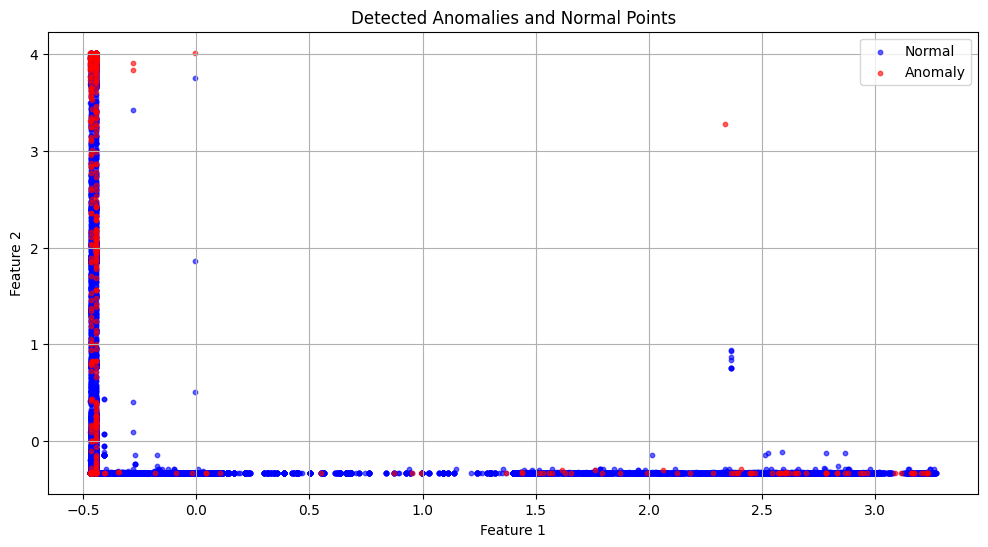

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))

# Plot normal points (Feature 1 vs. Feature 2)
plt.scatter(X_test[:, 0][y_pred == 1], X_test[:, 1][y_pred == 1], c='blue', label='Normal', s=10, alpha=0.6)

# Plot anomalies (Feature 1 vs. Feature 2)
plt.scatter(X_test[:, 0][y_pred == -1], X_test[:, 1][y_pred == -1], c='red', label='Anomaly', s=10, alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Detected Anomalies and Normal Points')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(X_train)

y_pred = iso_forest.predict(X_test)

print("Number of anomalies detected:", (y_pred == -1).sum())

iso_forest_predict = np.where(y_pred == -1, 1, 0)

accuracy = accuracy_score(y_test, iso_forest_predict)
print("Accuracy in separating Outliers:", accuracy)

unique_values, counts = np.unique(y_pred, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')


Number of anomalies detected: 372
Accuracy in separating Outliers: 0.99054426887384
Value: -1, Count: 372
Value: 1, Count: 39498
